In [2]:
import pandas as pd
from hanspell import spell_checker
from soynlp.normalizer import repeat_normalize

def safe_spell_checker(text):
    try:
        return spell_checker.check(text).checked
    except:
        return text

df_train = pd.read_csv('./data/train.csv')
df_dev = pd.read_csv('./data/dev.csv')

df = pd.concat([df_train, df_dev])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9874 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9874 non-null   object 
 1   source        9874 non-null   object 
 2   sentence_1    9874 non-null   object 
 3   sentence_2    9874 non-null   object 
 4   label         9874 non-null   float64
 5   binary-label  9874 non-null   float64
dtypes: float64(2), object(4)
memory usage: 540.0+ KB


In [4]:
from soynlp.normalizer import emoticon_normalize
import re 
def preproecssing_text(text):
    """
    reference: https://github.com/boostcampaitech6/level1-semantictextsimilarity-nlp-03/blob/main/augmentation.py
    
    """
    text = emoticon_normalize(text, num_repeats=2)
    text = repeat_normalize(text, num_repeats=2)
    text = text.lower()
    text = re.sub(r'[^a-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ?!<>\"\']', '', text)
    text.strip()
    text = safe_spell_checker(text)
    return text


In [8]:
from tqdm import tqdm, tqdm_pandas 
tqdm_pandas(tqdm())
df_tmp = df.copy()
df_tmp['sentence_1'] = df_tmp['sentence_1'].apply(preproecssing_text)
df_tmp['sentence_2'] = df_tmp['sentence_2'].apply(preproecssing_text)


0it [00:28, ?it/s]


<AxesSubplot:xlabel='label', ylabel='count'>

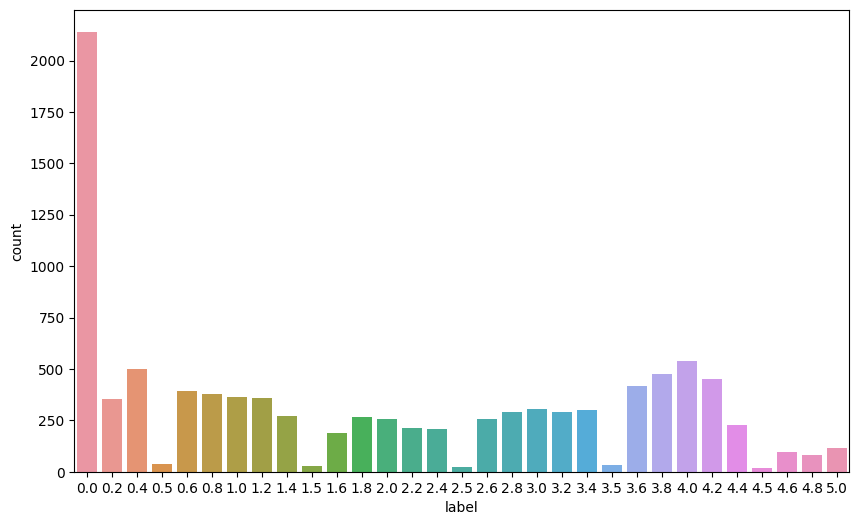

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data = df,x = 'label')

In [10]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9874 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9874 non-null   object 
 1   source        9874 non-null   object 
 2   sentence_1    9874 non-null   object 
 3   sentence_2    9874 non-null   object 
 4   label         9874 non-null   float64
 5   binary-label  9874 non-null   float64
dtypes: float64(2), object(4)
memory usage: 540.0+ KB


In [11]:
#  drop half of the label 0
df_label0 = df_tmp[df_tmp['label'] == 0].sample(frac=0.5, random_state=42)
df_tmp.drop(df_label0.index, inplace=True)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8745 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8745 non-null   object 
 1   source        8745 non-null   object 
 2   sentence_1    8745 non-null   object 
 3   sentence_2    8745 non-null   object 
 4   label         8745 non-null   float64
 5   binary-label  8745 non-null   float64
dtypes: float64(2), object(4)
memory usage: 478.2+ KB


In [12]:
# validation data
df_val = df_tmp.sample(frac=0.2, random_state=42)
df_train = df_tmp.drop(df_val.index)


In [14]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 1159 to 8988
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1749 non-null   object 
 1   source        1749 non-null   object 
 2   sentence_1    1749 non-null   object 
 3   sentence_2    1749 non-null   object 
 4   label         1749 non-null   float64
 5   binary-label  1749 non-null   float64
dtypes: float64(2), object(4)
memory usage: 95.6+ KB


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6822 entries, 1 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6822 non-null   object 
 1   source        6822 non-null   object 
 2   sentence_1    6822 non-null   object 
 3   sentence_2    6822 non-null   object 
 4   label         6822 non-null   float64
 5   binary-label  6822 non-null   float64
dtypes: float64(2), object(4)
memory usage: 373.1+ KB


In [16]:
df_tmp = pd.concat([df_train, df_val])
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8571 entries, 1 to 8988
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8571 non-null   object 
 1   source        8571 non-null   object 
 2   sentence_1    8571 non-null   object 
 3   sentence_2    8571 non-null   object 
 4   label         8571 non-null   float64
 5   binary-label  8571 non-null   float64
dtypes: float64(2), object(4)
memory usage: 468.7+ KB


In [17]:
df_train.to_csv('./data/train_preprocessed.csv', index=False)
df_val.to_csv('./data/val_preprocessed.csv', index=False)

In [18]:
# swap sentence_1 and sentence_2 for data augmentation label > 0
df_tmp = df_train[df_train['label'] > 0].copy()
df_tmp['sentence_1'], df_tmp['sentence_2'] = df_tmp['sentence_2'], df_tmp['sentence_1']
df_train = pd.concat([df_train, df_tmp])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 1 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12809 non-null  object 
 1   source        12809 non-null  object 
 2   sentence_1    12809 non-null  object 
 3   sentence_2    12809 non-null  object 
 4   label         12809 non-null  float64
 5   binary-label  12809 non-null  float64
dtypes: float64(2), object(4)
memory usage: 700.5+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

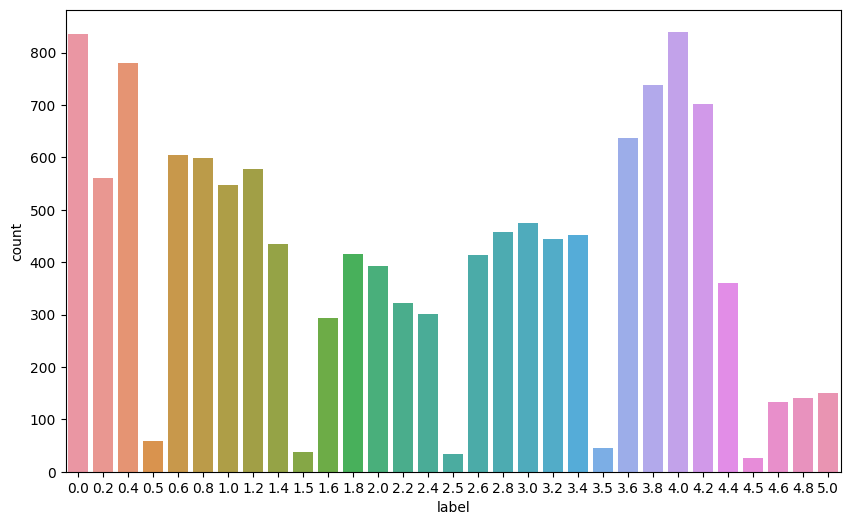

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data = df_train,x = 'label')

In [20]:
#from df_label0, get 300 data and make sentence_1 and sentence_2 to be equal
df_tmp = df_label0.sample(n=300, random_state=42)
df_tmp['sentence_2'] = df_tmp['sentence_1']
df_train = pd.concat([df_train, df_tmp])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13109 entries, 1 to 7166
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13109 non-null  object 
 1   source        13109 non-null  object 
 2   sentence_1    13109 non-null  object 
 3   sentence_2    13109 non-null  object 
 4   label         13109 non-null  float64
 5   binary-label  13109 non-null  float64
dtypes: float64(2), object(4)
memory usage: 716.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13109 entries, 1 to 7166
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13109 non-null  object 
 1   source        13109 non-null  object 
 2   sentence_1    13109 non-null  object 
 3   sentence_2    13109 non-null  object 
 4   label         13109 non-null  float64
 5   binary-label  13109 non-null  float64
dtypes: float64(2), object(4)
memory usage: 716.9+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

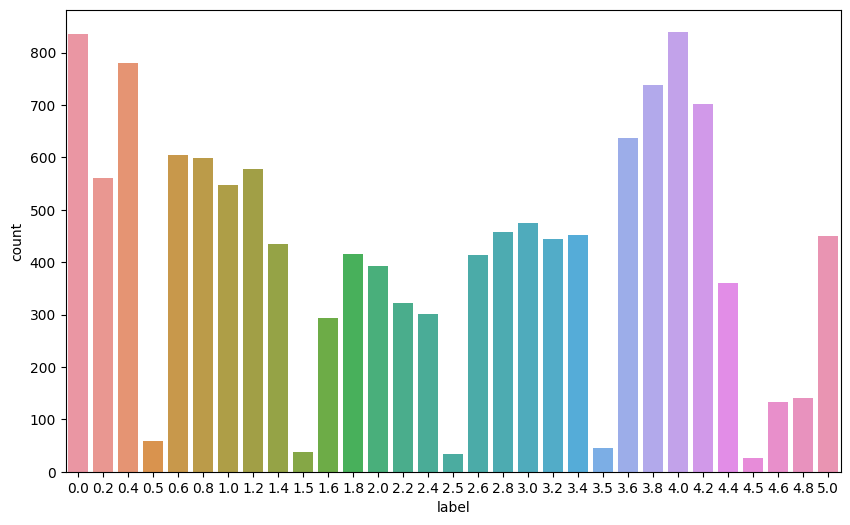

In [23]:
df_tmp['label'] = 5.0
df_train = pd.concat([df_train, df_tmp])
df_train.info()
plt.figure(figsize=(10,6))
sns.countplot(data = df_train,x = 'label')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13259 entries, 1 to 2479
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13259 non-null  object 
 1   source        13259 non-null  object 
 2   sentence_1    13259 non-null  object 
 3   sentence_2    13259 non-null  object 
 4   label         13259 non-null  float64
 5   binary-label  13259 non-null  float64
dtypes: float64(2), object(4)
memory usage: 725.1+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

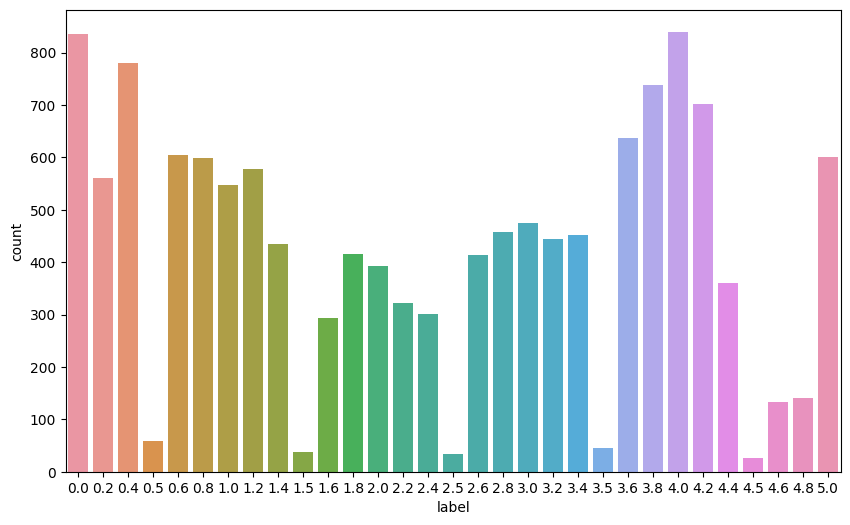

In [24]:
df_tmp = df_label0.sample(n=150, random_state=42)
df_tmp['sentence_1'] = df_tmp['sentence_2']
df_tmp['label'] = 5.0
df_train = pd.concat([df_train, df_tmp])
df_train.info()
plt.figure(figsize=(10,6))
sns.countplot(data = df_train,x = 'label')

In [25]:
df_train.to_csv('./data/train_preprocessed_augmented.csv', index=False)

In [26]:
emoticon_normalize("결사반대!!!!!!!!!!!!!!!!", num_repeats=2)


'결사반대!!!!!!!!!!!!!!!!'

In [27]:
repeat_normalize("결사반대!!!!!!!!!!!!!!!!", num_repeats=2)

'결사반대!!!!!!!!!!!!!!!!'

In [32]:
def reduce_repeated_chars(text, chars='?!<>.,', max_repeat=2):
    
    escaped_chars = re.escape(chars)
    pattern = f'([{escaped_chars}])\\1{{{max_repeat},}}'
    return re.sub(pattern, lambda m: m.group(1) * max_repeat, text)


In [33]:
# reduce repeated chars train,val data
df_train = pd.read_csv('./data/train_preprocessed_augmented.csv')
df_val = pd.read_csv('./data/val_preprocessed.csv')
df_train['sentence_1'] = df_train['sentence_1'].apply(reduce_repeated_chars)
df_train['sentence_2'] = df_train['sentence_2'].apply(reduce_repeated_chars)
df_val['sentence_1'] = df_val['sentence_1'].apply(reduce_repeated_chars)
df_val['sentence_2'] = df_val['sentence_2'].apply(reduce_repeated_chars)

In [34]:
df_train.to_csv('./data/train_preprocessed_augmented.csv', index=False)
df_val.to_csv('./data/val_preprocessed.csv', index=False)

In [35]:
# preprocess test data
df_test = pd.read_csv('./data/test.csv')
df_test['sentence_1'] = df_test['sentence_1'].apply(preproecssing_text)
df_test['sentence_2'] = df_test['sentence_2'].apply(preproecssing_text)
df_test['sentence_1'] = df_test['sentence_1'].apply(reduce_repeated_chars)
df_test['sentence_2'] = df_test['sentence_2'].apply(reduce_repeated_chars)
df_test.to_csv('./data/test_preprocessed.csv', index=False)